<a href="https://colab.research.google.com/github/ashurathore2k2/ML-project/blob/main/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
!pip install tpot

!pip install seaborn

!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:



from __future__ import division, print_function, unicode_literals

%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import randint
from scipy.stats import geom, expon
import pandas as pd
from pandas.plotting import scatter_matrix
pd.options.display.max_rows = 1000
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import os
from six.moves import urllib
from zlib import crc32
import hashlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import joblib
from sklearn.decomposition import FastICA
from sklearn.ensemble import ExtraTreesRegressor
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline, make_union
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)
from copy import copy
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


np.random.seed(42)

PROJECT_ROOT_DIR = "."
IMAGES_PATH = "figures/"
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

DOWNLOAD_ROOT = "https://archive.ics.uci.edu/ml/machine-learning-databases/00265/"
DOWNLOAD_FILES = "CASP.csv"
DATASET_URL = DOWNLOAD_ROOT + DOWNLOAD_FILES
FILES_PATH = "CASP_dataset/"

def fetch_dataset(dataset_url = DATASET_URL, files_path = FILES_PATH):
    if not os.path.isdir(files_path):
        os.makedirs(files_path)
    csv_path = os.path.join(files_path, "CASP.csv")
    urllib.request.urlretrieve(dataset_url, csv_path)

In [ ]:
fetch_dataset()


In [ ]:
df = pd.read_csv(os.path.join(FILES_PATH, "CASP.csv"))
df.head()

RMSD        F1       F2       F3        F4            F5        F6  \
0  17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1   6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2   9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3  15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4   7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   

        F7   F8       F9  
0  4287.87  102  27.0302  
1  3328.91   39  38.5468  
2  2981.04   29  38.8119  
3  3248.22   70  39.0651  
4  2814.42   41  39.9147

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RMSD    45730 non-null  float64
 1   F1      45730 non-null  float64
 2   F2      45730 non-null  float64
 3   F3      45730 non-null  float64
 4   F4      45730 non-null  float64
 5   F5      45730 non-null  float64
 6   F6      45730 non-null  float64
 7   F7      45730 non-null  float64
 8   F8      45730 non-null  int64  
 9   F9      45730 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


In [ ]:
df.describe()

RMSD            F1            F2            F3            F4  \
count  45730.000000  45730.000000  45730.000000  45730.000000  45730.000000   
mean       7.748528   9871.596995   3017.367175      0.302392    103.492433   
std        6.118312   4058.138034   1464.324663      0.062886     55.424985   
min        0.000000   2392.050000    403.500000      0.092500     10.310100   
25%        2.305000   6936.680000   1979.045000      0.258740     63.563900   
50%        5.030000   8898.805000   2668.155000      0.300150     87.740800   
75%       13.379000  12126.150000   3786.410000      0.342890    133.646750   
max       20.999000  40034.900000  15312.000000      0.577690    369.317000   

                 F5            F6             F7            F8            F9  
count  4.573000e+04  45730.000000   45730.000000  45730.000000  45730.000000  
mean   1.368299e+06    145.638061    3989.755990     69.975071     34.523664  
std    5.640367e+05     69.999230    1993.574575     56.493443      5.979755  
min    3.194902e+05     31.970400       0.000000      0.000000     15.228000  
25%    9.535912e+05     94.757500    3165.322500     31.000000     30.424725  
50%    1.237219e+06    126.176000    3840.170000     54.000000     35.299300  
75%    1.690920e+06    181.468500    4644.192500     91.000000     38.870800  
max    5.472011e+06    598.408000  105948.170000    350.000000     55.300900

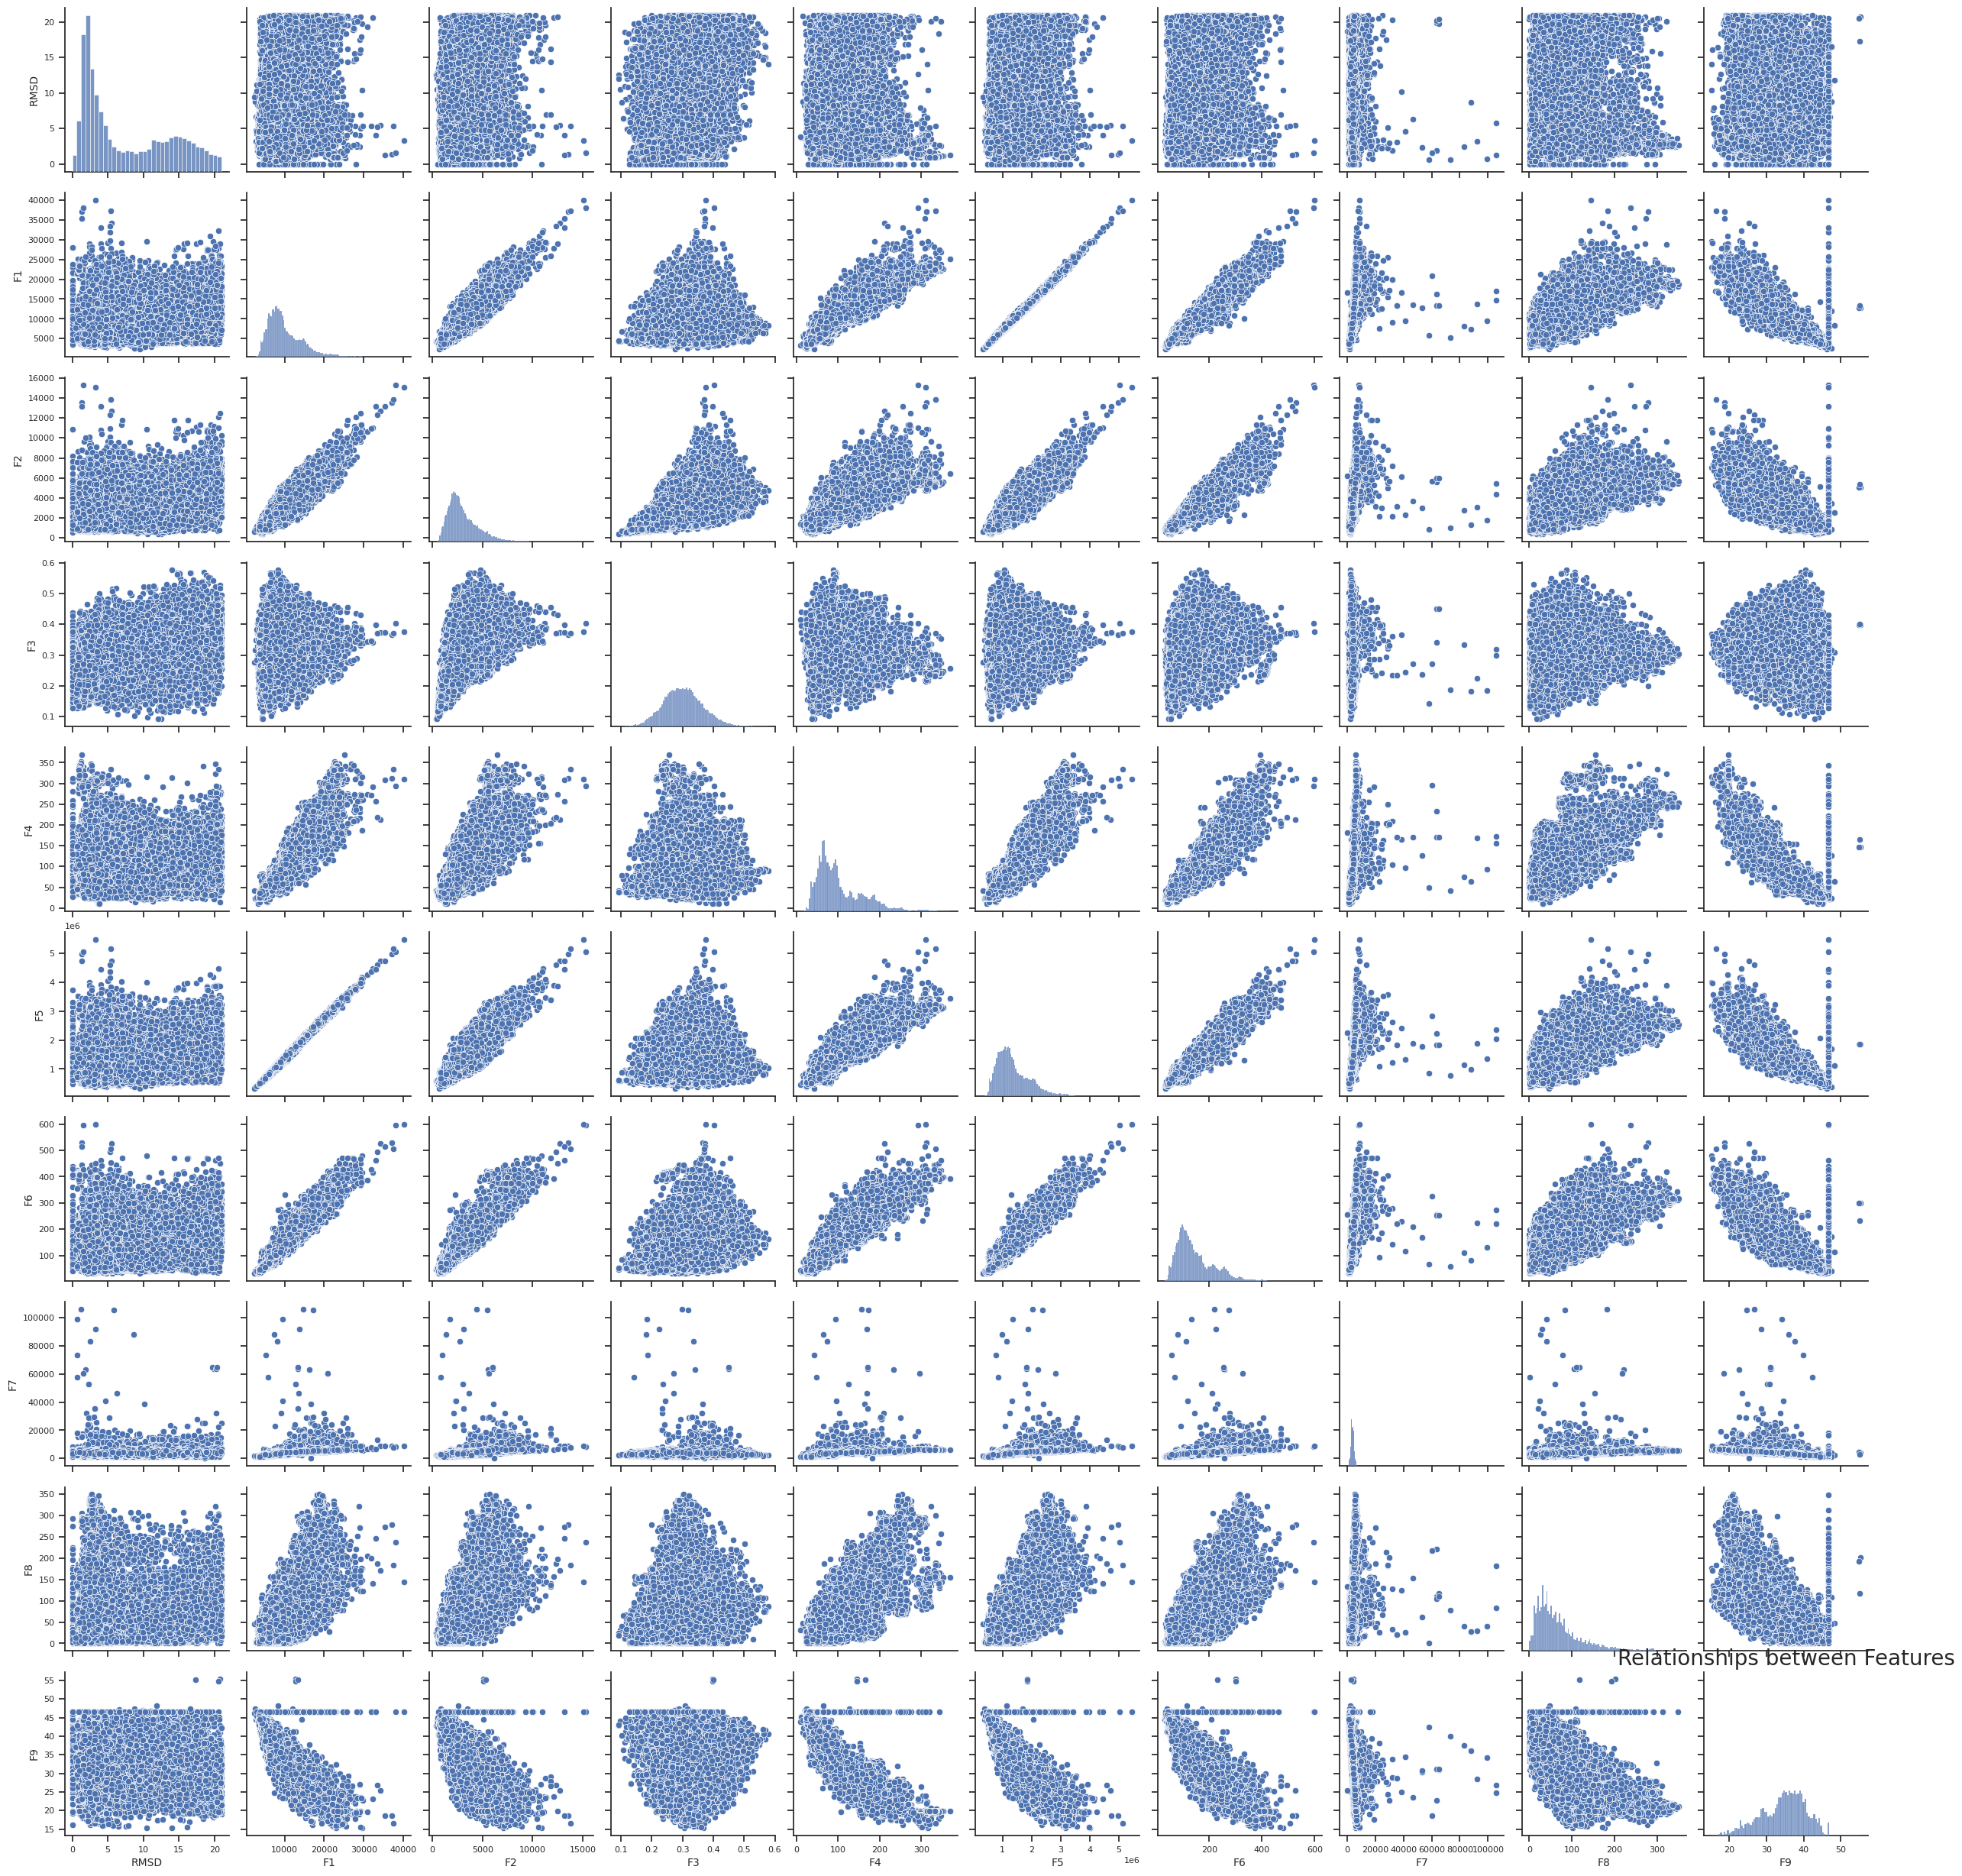

In [133]:
sns.pairplot(df)
plt.title('Relationships between Features')

plt.show()

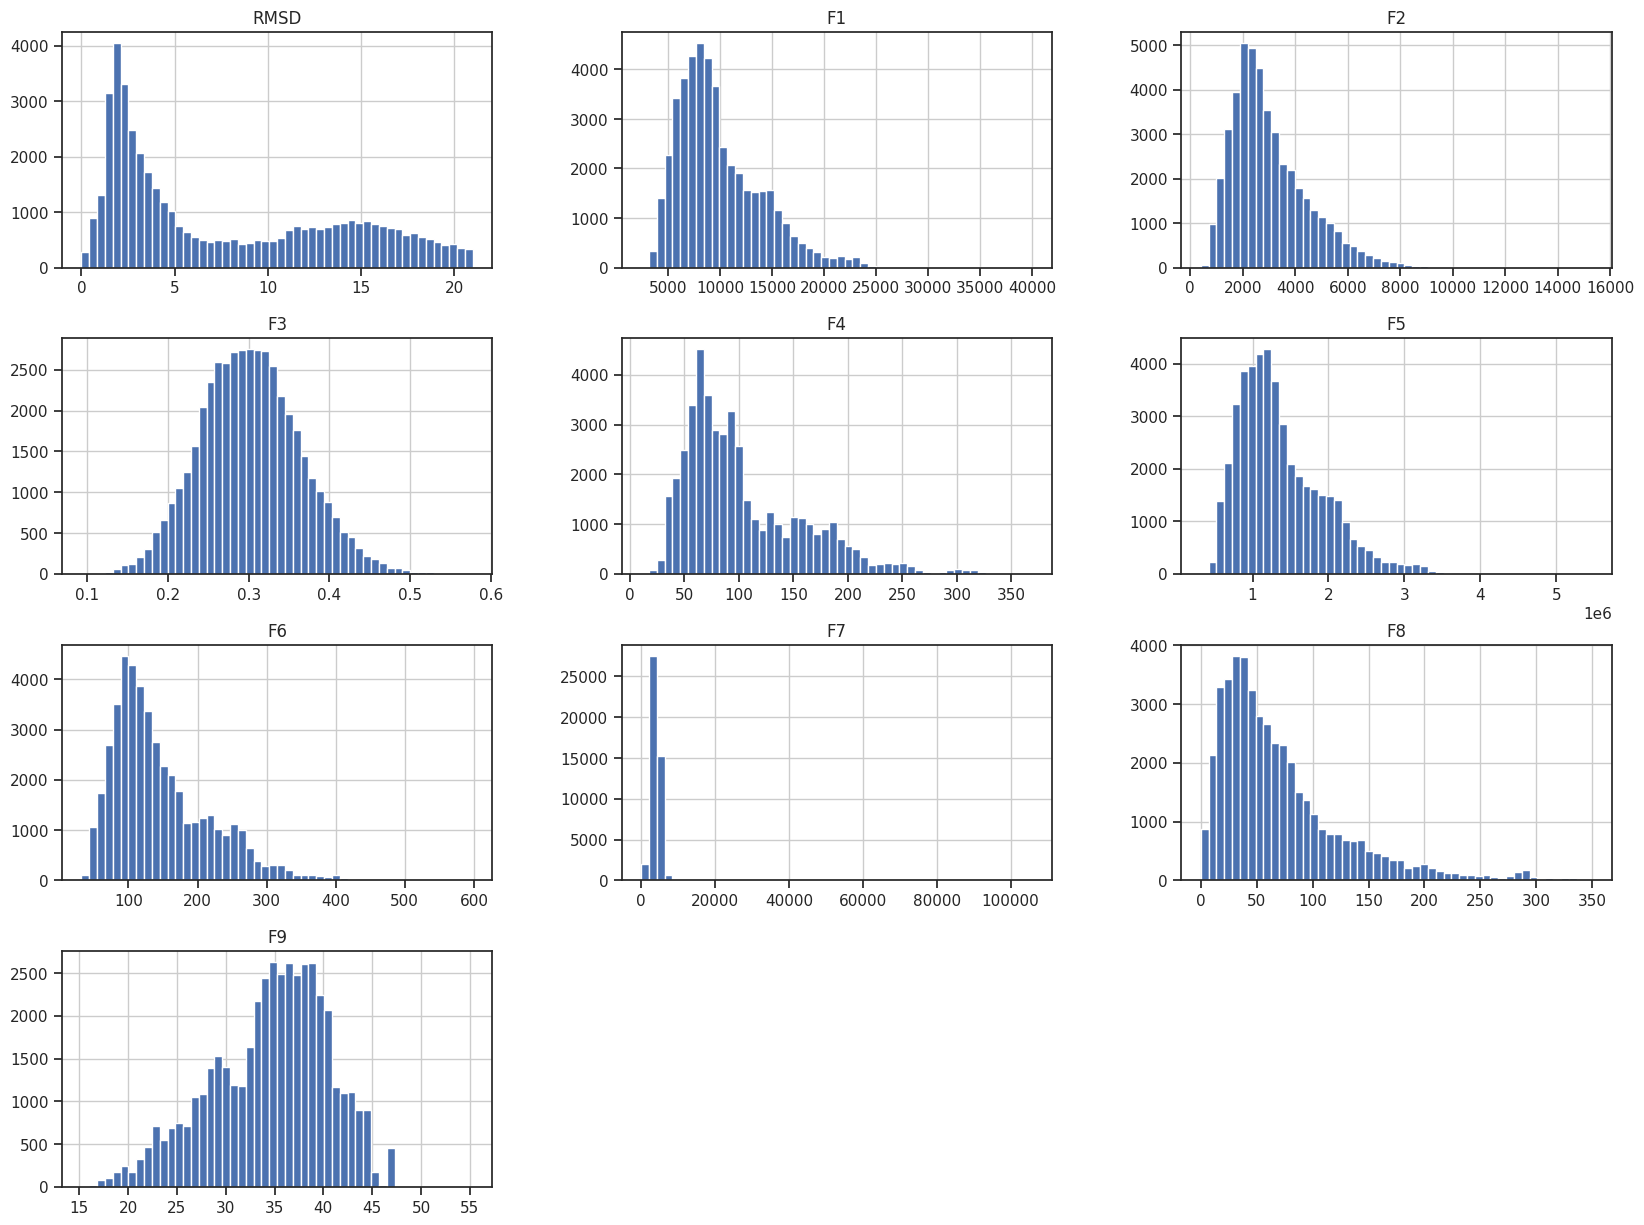

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

plt.show()

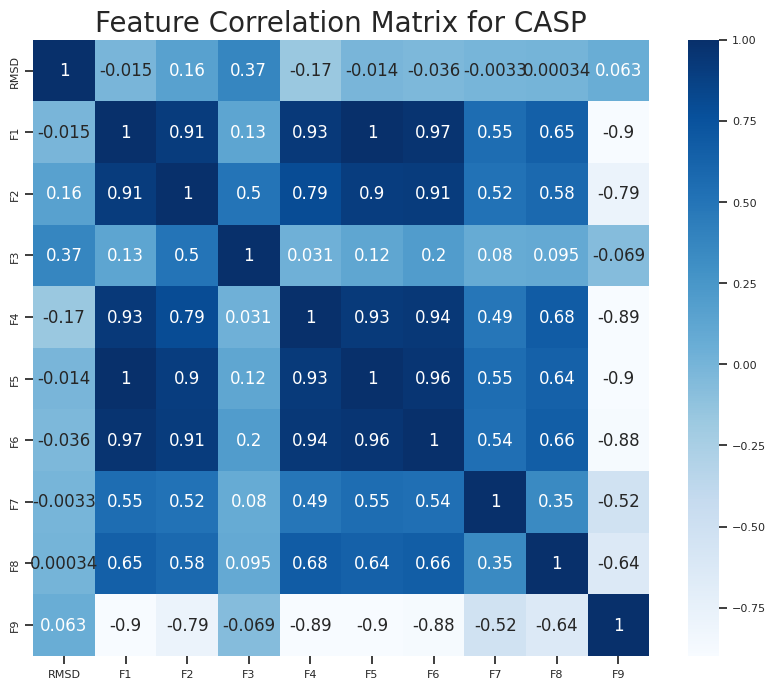

In [136]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
mpl.rcParams.update({'font.size': 12})
plt.rc('axes', titlesize = 20) 
plt.rc('axes', labelsize = 10)
plt.rc('xtick', labelsize = 8)    
plt.rc('ytick', labelsize = 8)    
plt.rc('legend', fontsize = 8)    
plt.rc('figure', titlesize = 20)
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='Blues')
plt.title('Feature Correlation Matrix for CASP')

plt.show()

In [ ]:
corr_matrix = df.corr()
corr_matrix["RMSD"].sort_values(ascending=False)

RMSD    1.000000
F3      0.374309
F2      0.156895
F9      0.062830
F8      0.000344
F7     -0.003339
F5     -0.013982
F1     -0.015087
F6     -0.036135
F4     -0.169771
Name: RMSD, dtype: float64

In [ ]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(df, 0.2)
print(len(train_set), "train +", len(test_set), "test")

36584 train + 9146 test


In [ ]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [ ]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [ ]:
df_with_id = df.reset_index()
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")

In [ ]:
df_with_id["id"] = df["RMSD"] * 1000 + df["F1"]
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "id")

In [ ]:
test_set.head()

index    RMSD        F1       F2       F3        F4            F5  \
2       2   9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   
6       6   9.314   5924.16  1625.27  0.27434   70.2103  8.285145e+05   
10     10  12.118   6556.77  1612.77  0.24597   71.6315  8.915443e+05   
14     14   6.581  17572.20  5226.42  0.29742  227.7690  2.434431e+06   
15     15   6.110  12330.60  4380.20  0.35523  195.9300  1.710155e+06   

          F6       F7   F8       F9        id  
2    81.7913  2981.04   29  38.8119  17000.98  
6    76.8064  2821.40   70  39.4964  15238.16  
10   93.5329  3161.33   76  38.0433  18674.77  
14  296.8000  4876.00  122  26.8169  24153.20  
15  232.1540  4321.41  164  30.4491  18440.60

In [ ]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
train_set.head()


RMSD        F1       F2       F3        F4            F5        F6  \
41068   4.332   5233.69  2031.85  0.38822   33.7670  7.424494e+05   67.9476   
14682   3.047   7819.23  2085.73  0.26674   79.8767  1.123877e+06  107.8100   
4387   14.226   8515.28  2640.61  0.31010   52.4593  1.148044e+06  113.6320   
40354  12.719   5924.27  2445.46  0.41278   56.5871  8.373160e+05   81.4286   
10172   1.422  15051.30  3870.64  0.25716  184.9900  2.125416e+06  217.6680   

            F7   F8       F9  
41068  2541.16   39  42.7544  
14682  3799.63   51  36.0298  
4387   4258.61   26  35.2010  
40354  2495.15  111  41.0368  
10172  5690.95   75  23.0361

In [ ]:
test_set.head()


RMSD        F1       F2       F3        F4            F5        F6  \
34288  18.858   7031.44  2456.97  0.34942   47.0180  1.008540e+06   88.0866   
34321   1.834  17099.10  5994.03  0.35054  223.8060  2.316828e+06  278.8630   
39086   2.732  16079.50  5807.81  0.36119  180.9630  2.250300e+06  272.1780   
5343    4.337  13600.60  3520.54  0.25885  167.1890  1.865227e+06  221.0140   
21632   3.032   7876.41  1984.92  0.25200   88.5033  1.051353e+06  112.9370   

            F7   F8       F9  
34288  3998.06    3  38.7263  
34321  5468.55  135  23.3121  
39086  5617.59  149  23.8631  
5343   4804.69  115  28.5555  
21632  3535.51   29  36.0818

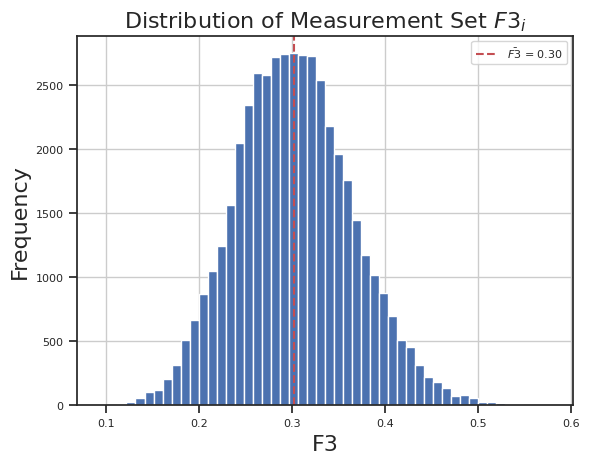

In [137]:
df["F3"].hist(bins=50)
plt.axvline(x=np.mean(df.F3), ls='--',color='r', label=r'$\bar{F3}$ = %.2f'%np.mean(df.F3.values))
plt.xlabel(r'F3',fontsize=16)
plt.ylabel(r'Frequency',fontsize=16)
plt.title('Distribution of Measurement Set $F3_{i}$',fontsize=16)
plt.legend()

plt.show()

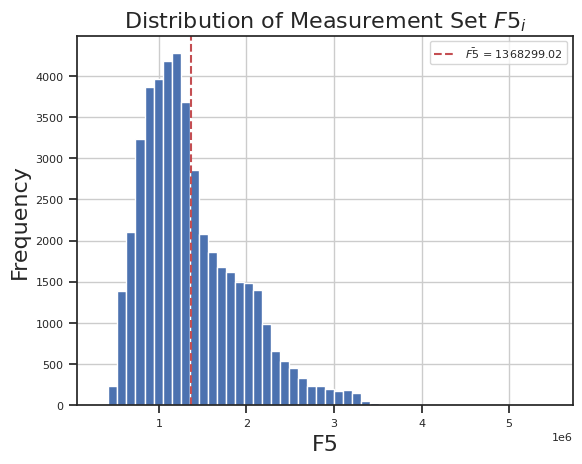

In [138]:
df.F5.hist(bins=50)
plt.axvline(x=np.mean(df.F5), ls='--',color='r', label=r'$\bar{F5}$ = %.2f'%np.mean(df.F5.values))
plt.xlabel(r'F5',fontsize=16)
plt.ylabel(r'Frequency',fontsize=16)
plt.title('Distribution of Measurement Set $F5_{i}$',fontsize=16)
plt.legend()

plt.show()

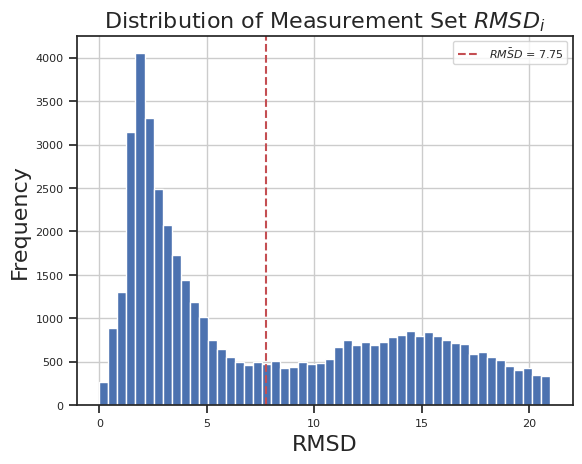

In [139]:
df.RMSD.hist(bins=50)
plt.axvline(x=np.mean(df.RMSD), ls='--',color='r', label=r'$\bar{RMSD}$ = %.2f'%np.mean(df.RMSD.values))
plt.xlabel(r'RMSD',fontsize=16)
plt.ylabel(r'Frequency',fontsize=16)
plt.title('Distribution of Measurement Set $RMSD_{i}$',fontsize=16)
plt.legend()

plt.show()

In [ ]:
df["F3_cat"] = np.ceil(df["F3"] * 10)


In [ ]:
# Label those above 5 as 5
df["F3_cat"].where(df["F3_cat"] < 5.0, 5.0, inplace=True)#REAJUSTAR LOS VALORES DE 5.0|b
df["F3_cat"].value_counts()

3.0    20736
4.0    19843
5.0     3066
2.0     2082
1.0        3
Name: F3_cat, dtype: int64

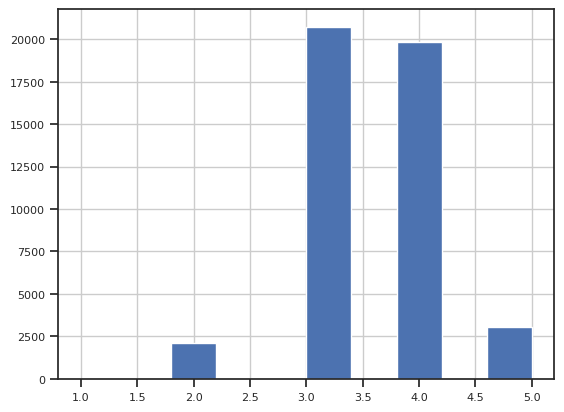

In [ ]:
df["F3_cat"].hist()

plt.show()

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["F3_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [ ]:
strat_test_set["F3_cat"].value_counts() / len(strat_test_set)


3.0    0.453422
4.0    0.433960
5.0    0.067024
2.0    0.045484
1.0    0.000109
Name: F3_cat, dtype: float64

In [ ]:
df["F3_cat"].value_counts() / len(df)


3.0    0.453444
4.0    0.433916
5.0    0.067046
2.0    0.045528
1.0    0.000066
Name: F3_cat, dtype: float64

In [ ]:
def F3_cat_proportions(data):
    return data["F3_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": F3_cat_proportions(df),
    "Stratified": F3_cat_proportions(strat_test_set),
    "Random": F3_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props


Overall  Stratified    Random  Rand. %error  Strat. %error
1.0  0.000066    0.000109  0.000109     66.666667      66.666667
2.0  0.045528    0.045484  0.044063     -3.218060      -0.096061
3.0  0.453444    0.453422  0.457686      0.935571      -0.004823
4.0  0.433916    0.433960  0.431664     -0.519075       0.010079
5.0  0.067046    0.067024  0.066477     -0.848010      -0.032616

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("F3_cat", axis=1, inplace=True)

In [ ]:
X = df.drop(['F3_cat'],axis=1).values
X_pca = decomposition.TruncatedSVD(n_components=2,random_state=42).fit_transform(X)

ValueError: ignored

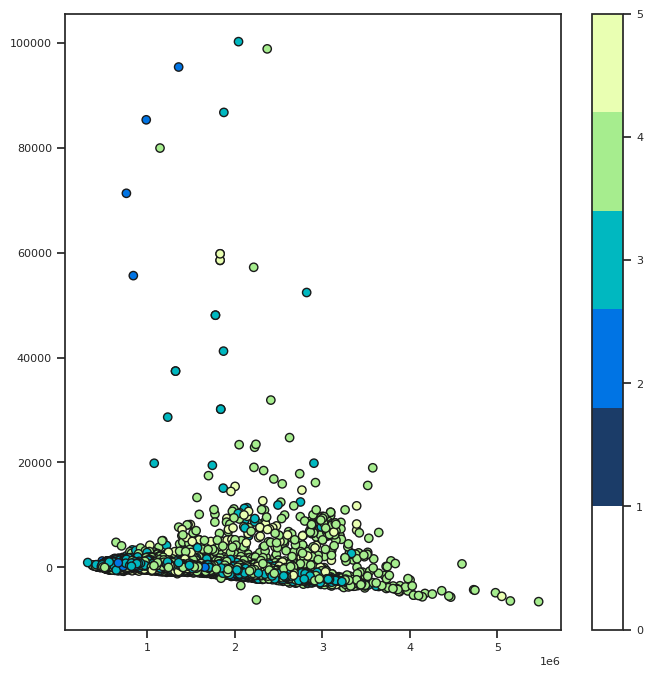

In [ ]:
def column(matrix, i):
    return [row[i] for row in matrix]


colors = ['#1b3c68','#0074e4','#00b8c0','#a6ed8e','#e9ffb2']
labels = ['Class 1','Class 2','Class 5','Class 4','Class 3']

fig = plt.figure(figsize=(8,8))
plt.scatter(column(X_pca, 0), column(X_pca, 1), c=df.F3_cat, cmap=mpl.colors.ListedColormap(colors),
            edgecolors='k')
cb = plt.colorbar()
loc = np.arange(0.0,5.001,1.0)
cb.set_ticks(loc)
cb.set_ticklabels(labels)
plt.title('Principal Component Analysis of "CASP.csv" with F3 categorization',fontsize=14)
plt.xlabel('E[0]')
plt.ylabel('E[1]')

plt.show()

In [ ]:
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(solver='svd',n_components=4).fit_transform(X2, df.F3_cat.values)

NameError: ignored

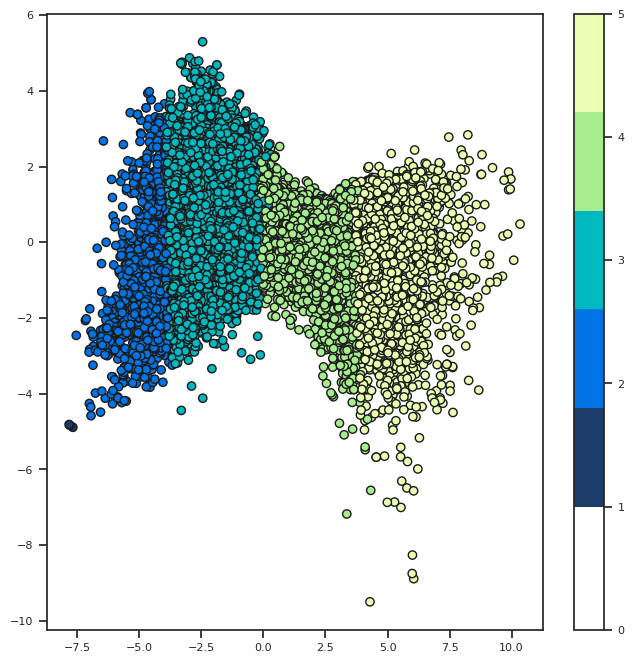

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.scatter(column(X_lda, 0), column(X_lda, 1), c=df.F3_cat, cmap=mpl.colors.ListedColormap(colors),
            edgecolors='k')
cb = plt.colorbar()
loc = np.arange(0.0,5.001,1.0)
cb.set_ticks(loc)
cb.set_ticklabels(range(ncolors))
plt.title('Linear Discriminant Analysis of "CASP.csv" with F3 Categorization',fontsize=14)
plt.xlabel('E[0]')
plt.ylabel('E[1]')

plt.show()

In [ ]:
df = strat_train_set.copy()
df.head()

RMSD       F1       F2       F3        F4            F5       F6  \
17966  18.862   9871.2  3648.88  0.36964   96.2809  1.388278e+06  154.096   
39997   3.044  14200.4  4030.59  0.28383  141.0920  1.973039e+06  175.063   
36194   7.627  15569.3  5520.71  0.35458  194.9220  2.116316e+06  242.859   
11150  10.699  21498.8  5916.14  0.27518  202.8100  3.067829e+06  304.962   
16805   2.814  10130.2  3247.79  0.32060   96.8942  1.390906e+06  140.127   

            F7   F8       F9  
17966  4170.49   39  33.6023  
39997  4621.50   60  30.0504  
36194  5372.99  103  24.9785  
11150  6532.91  301  18.9943  
16805  3562.08   14  36.1731

<Axes: xlabel='F1', ylabel='F4'>

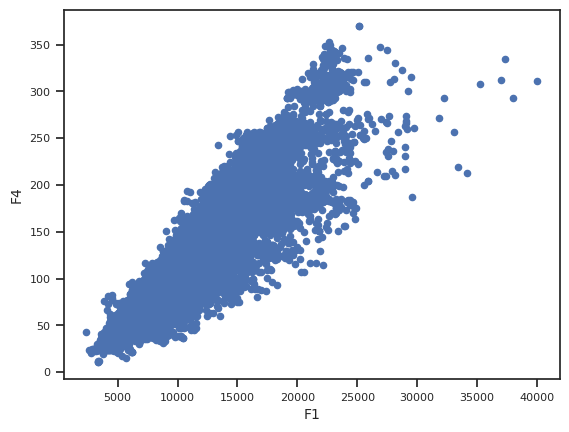

In [ ]:
df.plot(kind="scatter", x="F1", y="F4")


<Axes: xlabel='F1', ylabel='F4'>

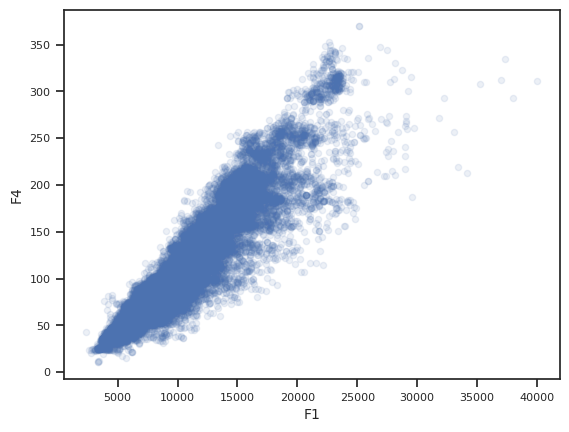

In [ ]:
df.plot(kind="scatter", x="F1", y="F4", alpha=0.1)

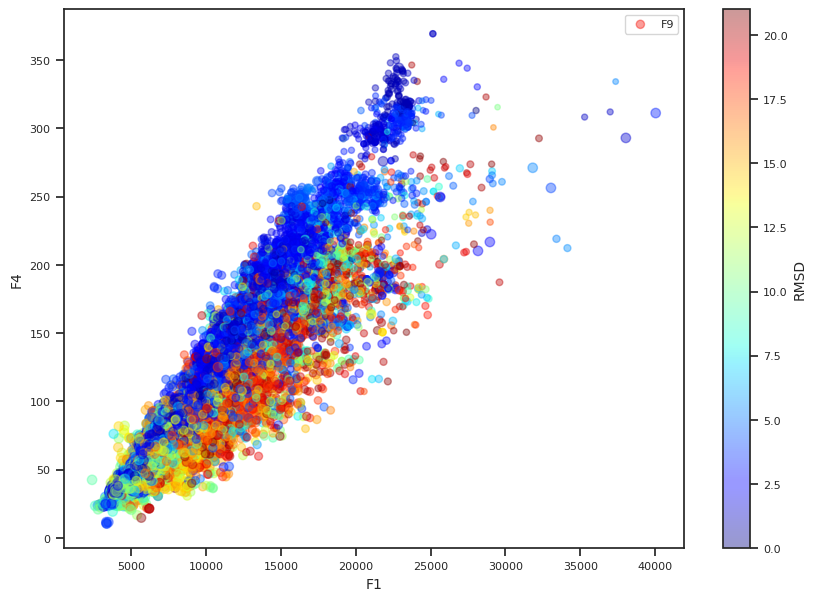

In [ ]:
df.plot(kind="scatter", x="F1", y="F4", alpha=0.4,s=df["F9"], label="F9", figsize=(10,7),
    c="RMSD", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()


In [ ]:
corr_matrix = df.corr()
corr_matrix["RMSD"].sort_values(ascending=False)
corr_matrix["F1"].sort_values(ascending=False)


F1      1.000000
F5      0.998202
F6      0.967862
F4      0.931101
F2      0.907416
F8      0.652369
F7      0.537675
F3      0.130584
RMSD   -0.014137
F9     -0.897783
Name: F1, dtype: float64

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='RMSD', ylabel='F3'>

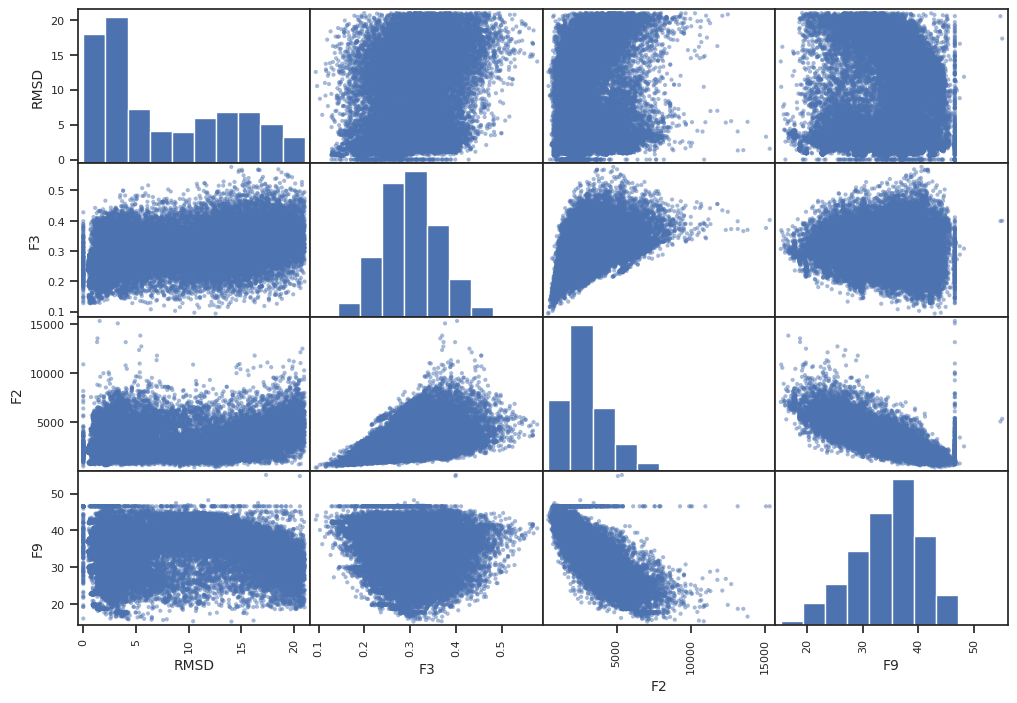

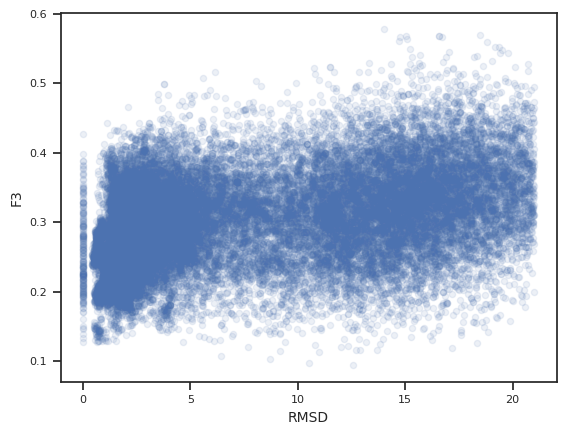

In [ ]:
attributes = ["RMSD", "F3", "F2","F9"]
scatter_matrix(df[attributes], figsize=(12, 8))
df.plot(kind="scatter", x="RMSD", y="F3",alpha=0.1)

<Axes: xlabel='RMSD', ylabel='F9'>

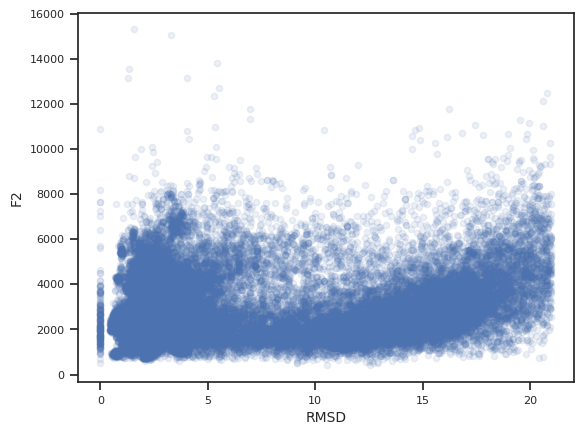

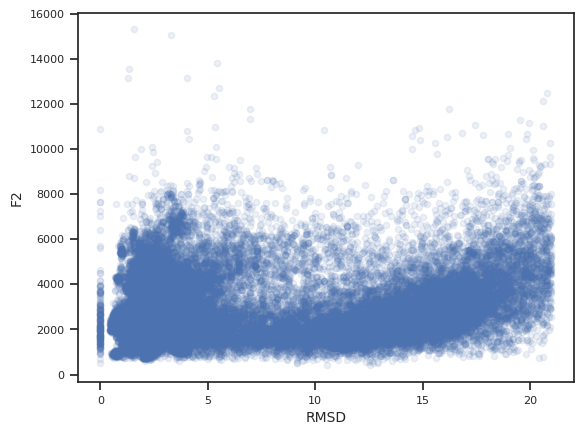

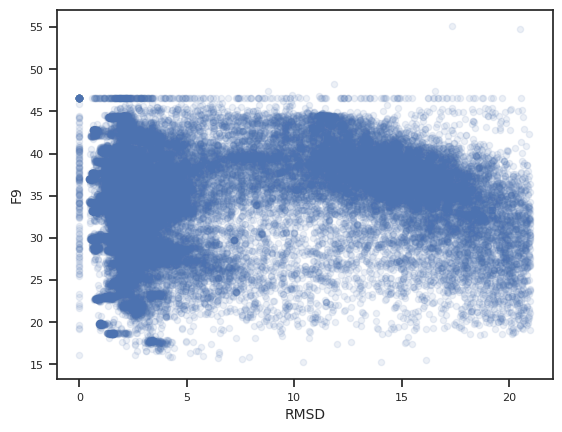

In [ ]:
df.plot(kind="scatter", x="RMSD", y="F2",alpha=0.1)
df.plot(kind="scatter", x="RMSD", y="F2",alpha=0.1)
df.plot(kind="scatter", x="RMSD", y="F9",alpha=0.1)

In [ ]:
df["F10"] = df["F2"]/df["F1"]
df["F11"] = df["F3"]/df["F5"]
df["F12"] = df["F4"]/df["F2"]
df["F13"] = df["F8"]/df["F9"]
df.head()
corr_matrix = df.corr()
corr_matrix["RMSD"].sort_values(ascending=False)

RMSD    1.000000
F3      0.374551
F10     0.374550
F2      0.156755
F11     0.153543
F9      0.062329
F8      0.001092
F7     -0.010680
F5     -0.012980
F1     -0.014137
F13    -0.032425
F6     -0.034723
F4     -0.167826
F12    -0.468635
Name: RMSD, dtype: float64

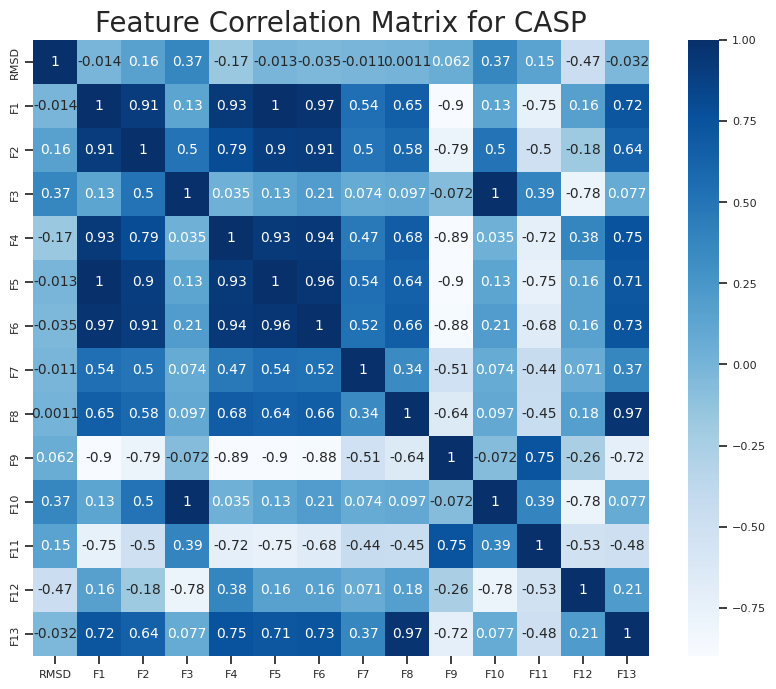

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
mpl.rcParams.update({'font.size': 10})
plt.rc('axes', titlesize = 20) 
plt.rc('axes', labelsize = 10)
plt.rc('xtick', labelsize = 8)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 8)    # fontsize of the tick labels
plt.rc('legend', fontsize = 8)    # legend fontsize
plt.rc('figure', titlesize = 20)
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='Blues')
plt.title('Feature Correlation Matrix for CASP')

plt.show()

In [ ]:
def compare_distributions(df1,df2,df3,df1n,df2n,df3n):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
    ax1.scatter(x=df1, y=df2,alpha=0.1)
    ax2.scatter(x=df1, y=df3,alpha=0.1)
    ax1.set_xlim(np.min(df1),np.max(df1))
    ax2.set_xlim(np.min(df1),np.max(df1))
    ax1.set_ylim(np.min(df2),np.max(df2))
    ax2.set_ylim(np.min(df3),np.max(df3))
    ax1.set_xlabel(df1n)
    ax1.set_ylabel(df2n)
    ax2.set_xlabel(df1n)
    ax2.set_ylabel(df3n)
    plt.tight_layout()
    return(plt.show())

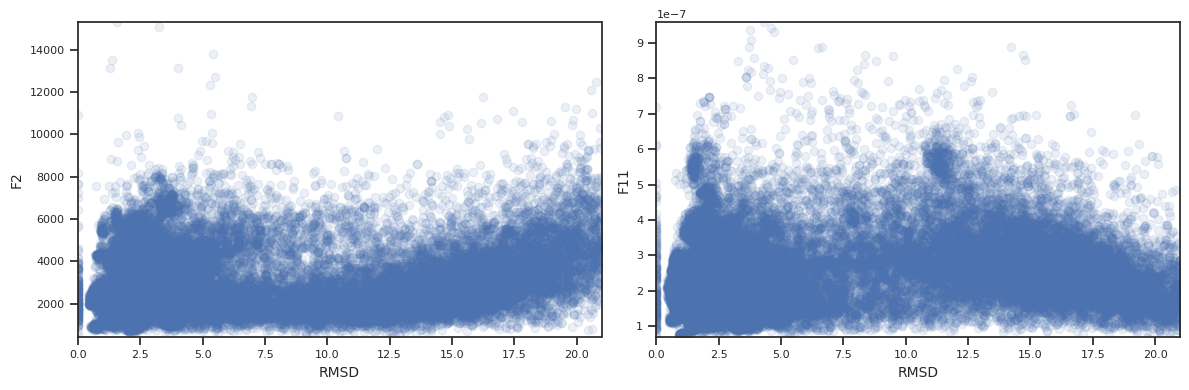

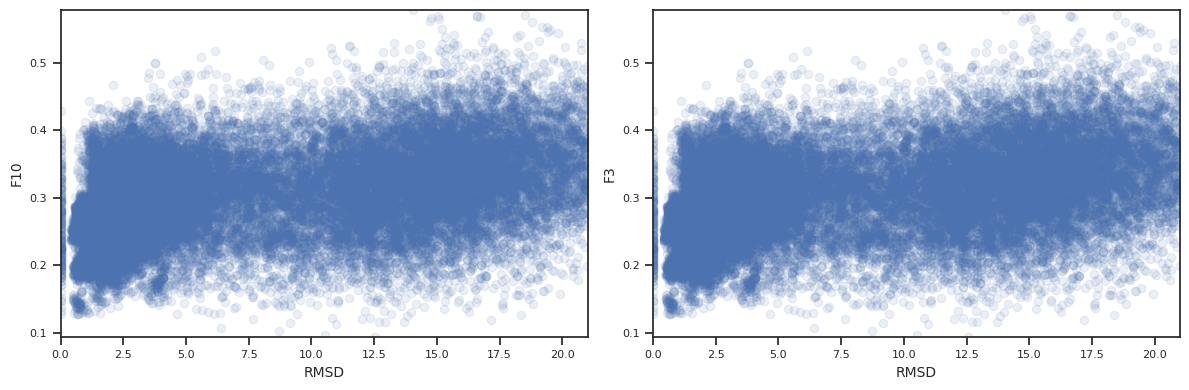

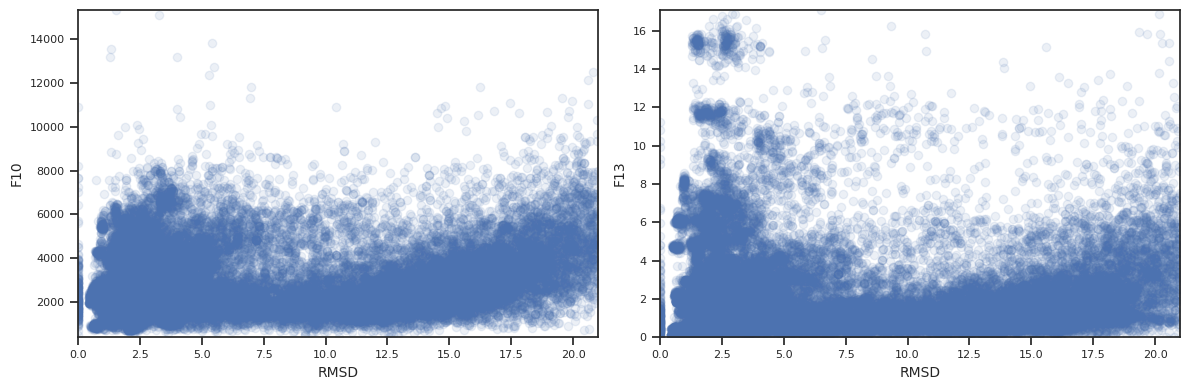

In [ ]:
compare_distributions(df.RMSD,df.F2,df.F11,'RMSD','F2','F11')
compare_distributions(df.RMSD,df.F3,df.F10,'RMSD','F10','F3')
compare_distributions(df.RMSD,df.F2,df.F13,'RMSD','F10','F13')


In [ ]:
df.describe()


RMSD            F1            F2            F3            F4  \
count  36584.000000  36584.000000  36584.000000  36584.000000  36584.000000   
mean       7.727808   9873.753673   3018.778685      0.302339    103.488396   
std        6.113492   4076.800970   1475.008095      0.062942     55.536501   
min        0.000000   2392.050000    403.500000      0.093620     10.310100   
25%        2.291000   6927.752500   1976.480000      0.258398     63.496825   
50%        5.007000   8894.535000   2663.095000      0.300160     87.721850   
75%       13.323000  12121.650000   3781.035000      0.342800    133.707250   
max       20.999000  40034.900000  15312.000000      0.577690    369.317000   

                 F5            F6             F7            F8            F9  \
count  3.658400e+04  36584.000000   36584.000000  36584.000000  36584.000000   
mean   1.368517e+06    145.636634    3992.842536     70.067079     34.529861   
std    5.666243e+05     70.280192    2060.635687     56.632614      5.990102   
min    3.194902e+05     32.939700    1089.190000      0.000000     15.228000   
25%    9.525325e+05     94.702850    3162.845000     31.000000     30.440700   
50%    1.236766e+06    126.055000    3839.540000     54.000000     35.312000   
75%    1.688919e+06    181.755750    4644.000000     91.000000     38.873875   
max    5.472011e+06    598.408000  105948.170000    350.000000     55.071500   

                F10           F11           F12           F13  
count  36584.000000  3.658400e+04  36584.000000  36584.000000  
mean       0.302344  2.557424e-07      0.035238      2.335064  
std        0.062942  1.116068e-07      0.010615      2.445614  
min        0.093630  6.875168e-08      0.006831      0.000000  
25%        0.258401  1.712598e-07      0.027524      0.822804  
50%        0.300167  2.357884e-07      0.034082      1.494522  
75%        0.342801  3.140116e-07      0.041902      2.900895  
max        0.577691  9.585423e-07      0.113317     17.080314

In [ ]:
df = strat_train_set.drop("RMSD", axis=1) # drop labels for training set
df_labels = strat_train_set["RMSD"].copy()
df.head()
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
sample_incomplete_rows

Empty DataFrame
Columns: [F1, F2, F3, F4, F5, F6, F7, F8, F9]
Index: []

In [ ]:
print(len(df))
df.dropna(subset=["F4"])
print(len(df))
df.drop("F4", axis=1).head(5)

36584
36584


F1       F2       F3            F5       F6       F7   F8       F9
17966   9871.2  3648.88  0.36964  1.388278e+06  154.096  4170.49   39  33.6023
39997  14200.4  4030.59  0.28383  1.973039e+06  175.063  4621.50   60  30.0504
36194  15569.3  5520.71  0.35458  2.116316e+06  242.859  5372.99  103  24.9785
11150  21498.8  5916.14  0.27518  3.067829e+06  304.962  6532.91  301  18.9943
16805  10130.2  3247.79  0.32060  1.390906e+06  140.127  3562.08   14  36.1731

In [ ]:
median = df["F4"].median()
df["F4"].fillna(median, inplace=True) # option 3
df.head()

F1       F2       F3        F4            F5       F6       F7  \
17966   9871.2  3648.88  0.36964   96.2809  1.388278e+06  154.096  4170.49   
39997  14200.4  4030.59  0.28383  141.0920  1.973039e+06  175.063  4621.50   
36194  15569.3  5520.71  0.35458  194.9220  2.116316e+06  242.859  5372.99   
11150  21498.8  5916.14  0.27518  202.8100  3.067829e+06  304.962  6532.91   
16805  10130.2  3247.79  0.32060   96.8942  1.390906e+06  140.127  3562.08   

        F8       F9  
17966   39  33.6023  
39997   60  30.0504  
36194  103  24.9785  
11150  301  18.9943  
16805   14  36.1731

In [ ]:
imputer = SimpleImputer(strategy="median")


In [ ]:
imputer.fit(df)


SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_
df.median().values
df.median().values == imputer.statistics_


array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
X = imputer.transform(df)
df_tr = pd.DataFrame(X, columns=df.columns,index = list(df.index.values))
df_tr.loc[sample_incomplete_rows.index.values]
df_tr.head()


F1       F2       F3        F4            F5       F6       F7  \
17966   9871.2  3648.88  0.36964   96.2809  1.388278e+06  154.096  4170.49   
39997  14200.4  4030.59  0.28383  141.0920  1.973039e+06  175.063  4621.50   
36194  15569.3  5520.71  0.35458  194.9220  2.116316e+06  242.859  5372.99   
11150  21498.8  5916.14  0.27518  202.8100  3.067829e+06  304.962  6532.91   
16805  10130.2  3247.79  0.32060   96.8942  1.390906e+06  140.127  3562.08   

          F8       F9  
17966   39.0  33.6023  
39997   60.0  30.0504  
36194  103.0  24.9785  
11150  301.0  18.9943  
16805   14.0  36.1731

In [ ]:
imputer.strategy
df_tr = pd.DataFrame(X, columns=df.columns)
df_tr.head()


F1       F2       F3        F4            F5       F6       F7     F8  \
0   9871.2  3648.88  0.36964   96.2809  1.388278e+06  154.096  4170.49   39.0   
1  14200.4  4030.59  0.28383  141.0920  1.973039e+06  175.063  4621.50   60.0   
2  15569.3  5520.71  0.35458  194.9220  2.116316e+06  242.859  5372.99  103.0   
3  21498.8  5916.14  0.27518  202.8100  3.067829e+06  304.962  6532.91  301.0   
4  10130.2  3247.79  0.32060   96.8942  1.390906e+06  140.127  3562.08   14.0   

        F9  
0  33.6023  
1  30.0504  
2  24.9785  
3  18.9943  
4  36.1731

In [ ]:
F1_ix, F2_ix, F3_ix, F4_ix, F5_ix, F6_ix = 1, 2, 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_F10 = False):
        self.add_F10 = add_F10
    def fit(self, X, y=None):
        return self  
    def transform(self, X, y=None):
        F11 = X[:, F3_ix] / X[:, F5_ix]
        F12 = X[:, F6_ix] / X[:, F5_ix]
        if self.add_F10:
            F10 = X[:, F2_ix] / X[:, F1_ix]
            return np.c_[X, F11, F12, F10]
        else:
            return np.c_[X, F11, F12]

attr_adder = CombinedAttributesAdder(add_F10=False)
df_extra_attribs = attr_adder.transform(df.values)

df_extra_attribs = pd.DataFrame(df_extra_attribs,columns=list(df.columns)+["F11", "F12"])
df_extra_attribs.head()

F1       F2       F3        F4            F5       F6       F7     F8  \
0   9871.2  3648.88  0.36964   96.2809  1.388278e+06  154.096  4170.49   39.0   
1  14200.4  4030.59  0.28383  141.0920  1.973039e+06  175.063  4621.50   60.0   
2  15569.3  5520.71  0.35458  194.9220  2.116316e+06  242.859  5372.99  103.0   
3  21498.8  5916.14  0.27518  202.8100  3.067829e+06  304.962  6532.91  301.0   
4  10130.2  3247.79  0.32060   96.8942  1.390906e+06  140.127  3562.08   14.0   

        F9       F11        F12  
0  33.6023  0.624811  27.064233  
1  30.0504  0.805950  26.399068  
2  24.9785  0.802614  22.123907  
3  18.9943  0.665034  21.422046  
4  36.1731  0.691474  25.420369

In [ ]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),])

df_num_tr = num_pipeline.fit_transform(df)
print(df_num_tr)
df_num_tr.shape
df_num_tr2 = pd.DataFrame(df_num_tr)
df_num_tr2.head()

[[-6.26399924e-04  4.27190826e-01  1.06926830e+00 ... -1.54851090e-01
  -6.85423114e-01 -1.98566274e-01]
 [ 1.06129916e+00  6.85979383e-01 -2.94070701e-01 ... -7.47820712e-01
   8.68668528e-01 -2.44995590e-01]
 [ 1.39708173e+00  1.69623849e+00  8.29996827e-01 ... -1.59454574e+00
   8.40047130e-01 -5.43406960e-01]
 ...
 [ 4.67888758e-02 -6.82437348e-02 -1.96995753e-01 ...  1.60807279e-01
  -4.00367325e-01 -3.52537835e-01]
 [-1.41355256e+00 -1.59316468e+00 -2.21856964e+00 ...  1.52298967e+00
  -5.50352564e-01  8.65292237e-01]
 [-8.96164329e-01 -5.31169555e-01  9.05782016e-01 ...  9.63625944e-01
  -3.04911393e-01 -2.76448615e-02]]


0         1         2         3         4         5         6   \
0 -0.000626  0.427191  1.069268 -0.129781  0.034874  0.120368  0.086211   
1  1.061299  0.685979 -0.294071  0.677106  1.066898  0.418706  0.305084   
2  1.397082  1.696238  0.829997  1.646392  1.319761  1.383373  0.669777   
3  2.851551  1.964329 -0.431501  1.788427  2.999050  2.267033  1.232679   
4  0.062905  0.155263  0.290127 -0.118738  0.039513 -0.078396 -0.209046   

         7         8         9         10  
0 -0.548580 -0.154851 -0.685423 -0.198566  
1 -0.177764 -0.747821  0.868669 -0.244996  
2  0.581527 -1.594546  0.840047 -0.543407  
3  4.077793 -2.593574 -0.340331 -0.592398  
4 -0.990027  0.274329 -0.113483 -0.313310

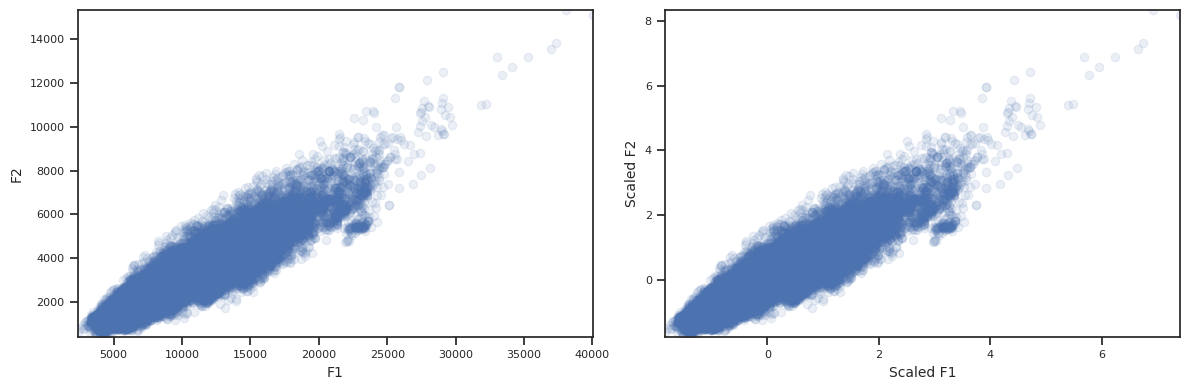

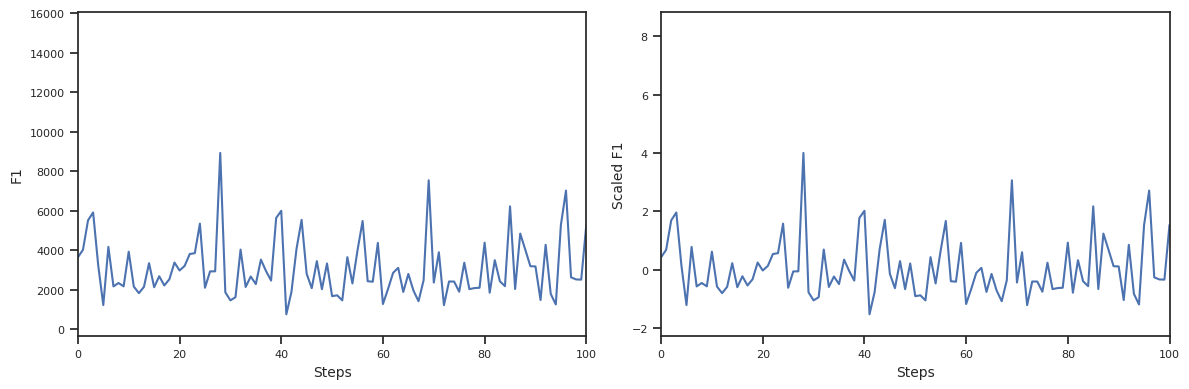

In [ ]:
df2 = df.reset_index()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=False)
ax1.scatter(df2.F1, df2.F2,alpha=0.1)
ax2.scatter(df_num_tr2[df_num_tr2.columns[0]],df_num_tr2[df_num_tr2.columns[1]],alpha=0.1)
ax1.set_xlim(np.min(df2.F1),np.max(df2.F1))
ax2.set_xlim(np.min(df_num_tr2[df_num_tr2.columns[0]]),np.max(df_num_tr2[df_num_tr2.columns[0]]))
ax1.set_ylim(np.min(df.F2),np.max(df.F2))
ax2.set_ylim(np.min(df_num_tr2[df_num_tr2.columns[1]]),np.max(df_num_tr2[df_num_tr2.columns[1]]))
ax1.set_xlabel('F1')
ax1.set_ylabel('F2')
ax2.set_xlabel('Scaled F1')
ax2.set_ylabel('Scaled F2')
plt.tight_layout()

plt.show()
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
ax1.plot(df2.index, df.F2)
ax2.plot(df_num_tr2.index, df_num_tr2[df_num_tr2.columns[1]])
ax1.set_xlim(0,100)
ax2.set_xlim(0,100)
ax1.set_xlabel('Steps')
ax1.set_ylabel('F1')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Scaled F1')
plt.tight_layout()

plt.show()


Regression

In [ ]:
df_prepared = df_num_tr
lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))
some_data_prepared

Predictions: [ 9.94300452  8.59194936  7.45264437 12.81558189  8.50429017]
Labels: [18.862, 3.044, 7.627, 10.699, 2.814]


array([[-6.26399924e-04,  4.27190826e-01,  1.06926830e+00,
        -1.29781209e-01,  3.48743134e-02,  1.20367929e-01,
         8.62112079e-02, -5.48579713e-01, -1.54851090e-01,
        -6.85423114e-01, -1.98566274e-01],
       [ 1.06129916e+00,  6.85979383e-01, -2.94070701e-01,
         6.77106369e-01,  1.06689817e+00,  4.18706421e-01,
         3.05083552e-01, -1.77763578e-01, -7.47820712e-01,
         8.68668528e-01, -2.44995590e-01],
       [ 1.39708173e+00,  1.69623849e+00,  8.29996827e-01,
         1.64639207e+00,  1.31976143e+00,  1.38337263e+00,
         6.69776970e-01,  5.81526602e-01, -1.59454574e+00,
         8.40047130e-01, -5.43406960e-01],
       [ 2.85155084e+00,  1.96432882e+00, -4.31500866e-01,
         1.78842672e+00,  2.99904976e+00,  2.26703341e+00,
         1.23267892e+00,  4.07779301e+00, -2.59357409e+00,
        -3.40331308e-01, -5.92397724e-01],
       [ 6.29046730e-02,  1.55263178e-01,  2.90126656e-01,
        -1.18737871e-01,  3.95129961e-02, -7.83963392e-02,
  

In [ ]:
df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
lin_mae = mean_absolute_error(df_labels, df_predictions)
lin_mae
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
scores = cross_val_score(tree_reg, df_prepared, df_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)
lin_scores = cross_val_score(lin_reg, df_prepared, df_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [5.20619561 5.3497165  5.27598493 4.81854213 5.06866269 4.87216568
 5.13948757 5.15468576 4.9996579  5.0956211 ]
Mean: 5.098071985449431
Standard deviation: 0.15852946403175008
Scores: [5.12054918 5.2531195  5.25426278 5.14373665 5.19626973 5.20415385
 5.11108949 5.17014051 5.11704796 5.23131927]
Mean: 5.180168893386863
Standard deviation: 0.05291613696497874


Random forest


In [ ]:
forest_reg = RandomForestRegressor(random_state=42,n_jobs=16)
forest_reg.fit(df_prepared, df_labels)
df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels,df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)
scores = cross_val_score(lin_reg, df_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

Scores: [3.5653859  3.57063046 3.69106396 3.47134057 3.54701228 3.57285632
 3.4988965  3.60633304 3.49423574 3.69282504]
Mean: 3.5710579797409374
Standard deviation: 0.0722075229107557


count    10.000000
mean      5.180169
std       0.055779
min       5.111089
25%       5.126346
50%       5.183205
75%       5.224528
max       5.254263
dtype: float64

In [ ]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(df_prepared, df_labels)
df_predictions = svm_reg.predict(df_prepared)
svm_mse = mean_squared_error(df_labels, df_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse
svm_reg_scores = cross_val_score(svm_reg, df_prepared, df_labels,scoring="neg_mean_squared_error", cv=10)
svm_reg_rmse_scores = np.sqrt(-svm_reg_scores)
display_scores(svm_reg_rmse_scores)

Scores: [5.37519431 5.3807593  5.37298786 5.31422138 5.61126275 5.41289045
 5.21478273 5.3971232  5.21402589 5.33669548]
Mean: 5.362994334791806
Standard deviation: 0.10634125106872813


In [ ]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(df_prepared, df_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_
grid_search.best_estimator_


RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.352314107891964 {'max_features': 2, 'n_estimators': 3}
3.85547040437034 {'max_features': 2, 'n_estimators': 10}
3.682679787808282 {'max_features': 2, 'n_estimators': 30}
4.331602583125747 {'max_features': 4, 'n_estimators': 3}
3.8236935745814935 {'max_features': 4, 'n_estimators': 10}
3.6519253154846036 {'max_features': 4, 'n_estimators': 30}
4.280664075490526 {'max_features': 6, 'n_estimators': 3}
3.80947336571667 {'max_features': 6, 'n_estimators': 10}
3.6551395135700844 {'max_features': 6, 'n_estimators': 30}
4.279910762778108 {'max_features': 8, 'n_estimators': 3}
3.8020580407063975 {'max_features': 8, 'n_estimators': 10}
3.6533977907435595 {'max_features': 8, 'n_estimators': 30}
4.185741190610778 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.7094471501517976 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.15045889413171 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.6992576754093993 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [ ]:
pd.DataFrame(grid_search.cv_results_)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.270947      0.003284         0.010735        0.000385   
1        0.887648      0.005722         0.033540        0.001733   
2        3.238801      0.535214         0.111203        0.010142   
3        0.494847      0.055855         0.010831        0.000321   
4        1.600122      0.101774         0.032625        0.002041   
5        5.183430      0.414732         0.095987        0.005734   
6        0.698081      0.047229         0.011094        0.000665   
7        2.399041      0.252122         0.034233        0.001912   
8        7.312035      0.362539         0.166278        0.141310   
9        0.879275      0.022529         0.010940        0.000265   
10       3.120197      0.280100         0.037163        0.004426   
11       9.900409      0.940911         0.098894        0.002791   
12       0.792301      0.521973         0.013921        0.000759   
13       1.315945      0.019457         0.039634        0.002545   
14       0.653958      0.132654         0.014178        0.001325   
15       1.896331      0.164449         0.040465        0.002641   
16       0.882726      0.150653         0.014076        0.001137   
17       2.485852      0.306553         0.039617        0.002250   

   param_max_features param_n_estimators param_bootstrap  \
0                   2                  3             NaN   
1                   2                 10             NaN   
2                   2                 30             NaN   
3                   4                  3             NaN   
4                   4                 10             NaN   
5                   4                 30             NaN   
6                   6                  3             NaN   
7                   6                 10             NaN   
8                   6                 30             NaN   
9                   8                  3             NaN   
10                  8                 10             NaN   
11                  8                 30             NaN   
12                  2                  3           False   
13                  2                 10           False   
14                  3                  3           False   
15                  3                 10           False   
16                  4                  3           False   
17                  4                 10           False   

                                               params  split0_test_score  \
0              {'max_features': 2, 'n_estimators': 3}         -18.988238   
1             {'max_features': 2, 'n_estimators': 10}         -15.102741   
2             {'max_features': 2, 'n_estimators': 30}         -13.691436   
3              {'max_features': 4, 'n_estimators': 3}         -18.745254   
4             {'max_features': 4, 'n_estimators': 10}         -14.736567   
5             {'max_features': 4, 'n_estimators': 30}         -13.378776   
6              {'max_features': 6, 'n_estimators': 3}         -18.151450   
7             {'max_features': 6, 'n_estimators': 10}         -14.488281   
8             {'max_features': 6, 'n_estimators': 30}         -13.426571   
9              {'max_features': 8, 'n_estimators': 3}         -18.629591   
10            {'max_features': 8, 'n_estimators': 10}         -14.431921   
11            {'max_features': 8, 'n_estimators': 30}         -13.333913   
12  {'bootstrap': False, 'max_features': 2, 'n_est...         -17.464941   
13  {'bootstrap': False, 'max_features': 2, 'n_est...         -13.686800   
14  {'bootstrap': False, 'max_features': 3, 'n_est...         -16.930846   
15  {'bootstrap': False, 'max_features': 3, 'n_est...         -13.669388   
16  {'bootstrap': False, 'max_features': 4, 'n_est...         -17.761865   
17  {'bootstrap': False, 'max_features': 4, 'n_est...         -13.676005   

    split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -19.201964  ...       -18.942638  

In [ ]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42,n_jobs=16)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.06412937, 0.09189559, 0.12198812, 0.10525517, 0.06835455,
       0.07095633, 0.07657028, 0.11119855, 0.07259289, 0.14388762,
       0.07317152])

TUNED REGRESSOR


In [ ]:
F1_ix, F2_ix, F3_ix, F4_ix, F5_ix, F6_ix = 1, 2, 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_F10 = False): # no *args or **kargs
        self.add_F10 = add_F10
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        F11 = X[:, F3_ix] / X[:, F5_ix]
        F12 = X[:, F4_ix] / X[:, F5_ix]
        F13 = X[:, F4_ix] / X[:, F6_ix]
        X = np.delete(X, 0, 1)
        X = np.delete(X, 5, 1)
        if self.add_F10:
            F10 = X[:, F2_ix] / X[:, F1_ix]
            return np.c_[X, F11, F12, F13, F10]
        else:
            return np.c_[X, F11, F12, F13]

attr_adder = CombinedAttributesAdder(add_F10=False)
df_extra_attribs = attr_adder.transform(df.values)

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),])
df = pd.read_csv(os.path.join(FILES_PATH, "CASP.csv"))
df.head()

RMSD        F1       F2       F3        F4            F5        F6  \
0  17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1   6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2   9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3  15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4   7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   

        F7   F8       F9  
0  4287.87  102  27.0302  
1  3328.91   39  38.5468  
2  2981.04   29  38.8119  
3  3248.22   70  39.0651  
4  2814.42   41  39.9147

In [ ]:
features = num_pipeline.fit_transform(df)
training_features, testing_features, training_target, testing_target = train_test_split(features, 
                                                                                        df['RMSD'].values,
                                                                                        random_state=42)

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(training_features, training_target)

results = tree_reg.predict(training_features)
tree_mse = mean_squared_error(training_target, results)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.10824400552275021

In [ ]:
scores = cross_val_score(tree_reg, training_features, training_target,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)
results = tree_reg.predict(testing_features)
tree_mse = mean_squared_error(testing_target,results)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

Scores: [5.24868173 5.13129988 5.25950023 5.17598539 5.26143392 5.01948344
 5.08944862 5.22442326 5.1354515  5.22106865]
Mean: 5.176677661733841
Standard deviation: 0.07717262194083496


5.094381716907418

In [ ]:
tree_scores = cross_val_score(tree_reg, testing_features, testing_target,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)
forest_reg = RandomForestRegressor(random_state=42,n_jobs=16)

forest_reg.fit(training_features, training_target)
results = forest_reg.predict(training_features)

Scores: [5.7331005  5.68175054 5.60106565 5.70014292 5.49538677 5.76302248
 5.76579575 5.76091689 5.65067646 5.59418242]
Mean: 5.674604037398569
Standard deviation: 0.08501510984604453


In [ ]:
forest_mse = mean_squared_error(training_target,results)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
forest_scores = cross_val_score(forest_reg, training_features, training_target,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.67450326 3.62819454 3.70779346 3.60080254 3.66789313 3.56272948
 3.65029699 3.62653218 3.56126786 3.61934353]
Mean: 3.6299356962480545
Standard deviation: 0.04484522872742199


RANDOM FOREST TESTING

In [ ]:
results = forest_reg.predict(testing_features)
forest_mse = mean_squared_error(testing_target,results)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

forest_scores = cross_val_score(forest_reg, testing_features, testing_target,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [4.01352857 3.98368554 3.98031954 4.13419019 4.00116505 4.12807785
 4.02097372 4.06538047 3.89513327 3.98526995]
Mean: 4.020772416726283
Standard deviation: 0.06845610305404767


In [ ]:
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RandomForestRegressor(bootstrap=False, max_features=0.4, min_samples_leaf=2,
                                                      min_samples_split=5, n_estimators=100)),
    RandomForestRegressor(bootstrap=False, max_features=0.6500000000000001,min_samples_leaf=19,
                          min_samples_split=17,n_estimators=100,n_jobs=16,random_state=42)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(training_features)

own_forest_mse = mean_squared_error(training_target,results)
own_forest_rmse = np.sqrt(own_forest_mse)
own_forest_rmse

0.4539411984313447

In [124]:
own_forest_scores = cross_val_score(exported_pipeline, training_features, training_target,scoring="neg_mean_squared_error", cv=10)
own_forest_rmse_scores = np.sqrt(-own_forest_scores)
display_scores(own_forest_rmse_scores)

Scores: [3.57544409 3.5099228  3.56758435 3.472838   3.56233547 3.43484203
 3.53762619 3.4526077  3.41414291 3.50897537]
Mean: 3.5036318910016186
Standard deviation: 0.05496254622191282


Tuned Random Forest Testing

In [125]:
results = exported_pipeline.predict(testing_features)
own_forest_mse_testing = mean_squared_error(testing_target,results)
own_forest_rmse_testing = np.sqrt(own_forest_mse_testing)
own_forest_rmse_testing

3.4555723083561207

In [126]:
own_forest_testing_scores = cross_val_score(exported_pipeline, testing_features, testing_target,scoring="neg_mean_squared_error", cv=10)
own_forest_testing_rmse_scores = np.sqrt(-own_forest_testing_scores)
display_scores(own_forest_testing_rmse_scores)

Scores: [3.96300782 3.89356895 3.86981925 3.97301762 3.92377159 4.01367983
 3.94006536 3.9879395  3.88608628 3.90354478]
Mean: 3.9354501011322562
Standard deviation: 0.04551882939139629


 ExtraTreesRegressor kernel and independent component analysis 
 ICA

In [128]:
exported_pipeline = make_pipeline(
    make_union(
        make_union(
            FunctionTransformer(copy),
            FastICA(tol=0.0)
        ),
        FastICA(tol=0.0)
    ),
    ExtraTreesRegressor(bootstrap=False, max_features=0.45, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(training_features)

own_ensemble_mse = mean_squared_error(training_target,results)
own_ensemble_rmse = np.sqrt(own_ensemble_mse)
own_ensemble_rmse

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


0.10824400552275021

In [129]:
own_ensemble_scores = cross_val_score(exported_pipeline, training_features, training_target,scoring="neg_mean_squared_error", cv=10)
own_ensemble_rmse_scores = np.sqrt(-own_ensemble_scores)
display_scores(own_ensemble_rmse_scores)

results = exported_pipeline.predict(testing_features)

own_ensemble_mse_testing = mean_squared_error(testing_target,results)
own_ensemble_rmse_testing = np.sqrt(own_ensemble_mse_testing)
own_ensemble_rmse_testing

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposi

Scores: [3.39935719 3.35059188 3.43755235 3.34040974 3.40184526 3.28131079
 3.37501118 3.34984529 3.27400512 3.36169273]
Mean: 3.3571621523987822
Standard deviation: 0.04860511135940186


3.3031176311251382

In [130]:
own_ensemble_testing_scores = cross_val_score(exported_pipeline, testing_features, testing_target,scoring="neg_mean_squared_error", cv=10)
own_ensemble_testing_rmse_scores = np.sqrt(-own_ensemble_testing_scores)
display_scores(own_ensemble_testing_rmse_scores)

rmse_values = np.array([tree_rmse,forest_rmse,own_forest_rmse_testing,own_ensemble_rmse_testing])
mean_values = np.array([np.mean(tree_rmse_scores),np.mean(forest_rmse_scores),
                        np.mean(own_forest_testing_rmse_scores),np.mean(own_ensemble_testing_rmse_scores)])
std_values = np.array([np.std(tree_rmse_scores),np.std(forest_rmse_scores),
                        np.std(own_forest_testing_rmse_scores),np.std(own_ensemble_testing_rmse_scores)])
Method_labels = ['Decision Trees','Random Forest','Tuned Random Forest', 'Ensemble Method']
df_cross_validation = pd.DataFrame(columns={'Method','Mean Value', 'Standard Deviation', 'RMSE'})
df_cross_validation['Mean Value'] = mean_values
df_cross_validation['RMSE'] = rmse_values
df_cross_validation['Standard Deviation'] = std_values
df_cross_validation['Method'] = Method_labels
df_cross_validation

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposi

Scores: [3.78155585 3.7173052  3.77196148 3.77360741 3.77392239 3.74615634
 3.73236558 3.8183051  3.72270819 3.65043431]
Mean: 3.7488321849577084
Standard deviation: 0.04394597202651047


Standard Deviation      RMSE               Method  Mean Value
0            0.085015  5.094382       Decision Trees    5.674604
1            0.068456  3.587740        Random Forest    4.020772
2            0.045519  3.455572  Tuned Random Forest    3.935450
3            0.043946  3.303118      Ensemble Method    3.748832

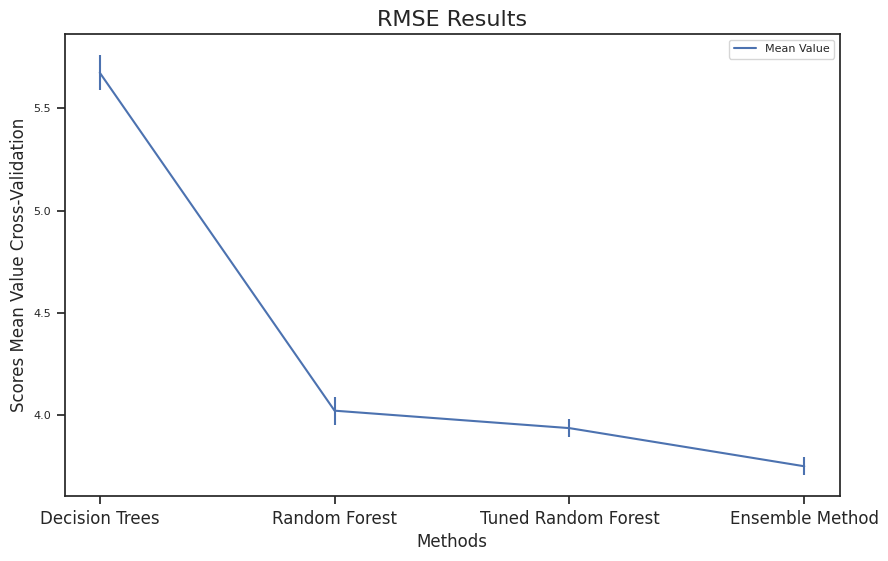

In [132]:
df_cross_validation.plot(kind='line',x='Method',y='Mean Value',yerr='Standard Deviation',figsize=(10,6))
plt.title('RMSE Results', fontsize=16)
plt.xlabel('Methods',fontsize=12)
plt.xticks(np.arange(4), ('Decision Trees','Random Forest','Tuned Random Forest', 'Ensemble Method'),fontsize=12)
plt.ylabel('Scores Mean Value Cross-Validation',fontsize=12)

plt.show()